## Covariance & Joint distribution
---
**Elo notes**

In probability theory and statistics, covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, i.e., the variables tend to show similar behavior, the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, i.e., the variables tend to show opposite behavior, the covariance is negative. The magnitude of the covariance is not easy to interpret. The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.

A distinction must be made between (1) the covariance of two random variables, which is a population parameter that can be seen as a property of the joint probability distribution, and (2) the sample covariance, which in addition to serving as a descriptor of the sample, also serves as an estimated value of the population parameter.

The covariance between two jointly distributed real-valued random variables X and Y with finite second moments is defined as

${\displaystyle \operatorname {cov} (X,Y)=\operatorname {E} {{\big [}(X-\operatorname {E} [X])(Y-\operatorname {E} [Y]){\big ]}},}$

where $E[X]$ is the expected value of $X$, also known as the mean of $X$. The covariance is also sometimes denoted “$σ$”, in analogy to variance. By using the linearity property of expectations, this can be simplified to

${\displaystyle {\begin{aligned}\operatorname {cov} (X,Y)&=\operatorname {E} \left[\left(X-\operatorname {E} \left[X\right]\right)\left(Y-\operatorname {E} \left[Y\right]\right)\right]\\&=\operatorname {E} \left[XY-X\operatorname {E} \left[Y\right]-\operatorname {E} \left[X\right]Y+\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right]\right]\\&=\operatorname {E} \left[XY\right]-\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right]-\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right]+\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right]\\&=\operatorname {E} \left[XY\right]-\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right].\end{aligned}}}$

However, when ${\displaystyle \operatorname {E} [XY]\approx \operatorname {E} [X]\operatorname {E} [Y]} $, this last equation is prone to catastrophic cancellation when computed with floating point arithmetic and thus should be avoided in computer programs when the data has not been centered before. Numerically stable algorithms should be preferred in this case.

For random vectors ${\displaystyle \mathbf {X} \in \mathbb {R} ^{m}} $ and $ {\displaystyle \mathbf {Y} \in \mathbb {R} ^{n}} $, the $m × n$ cross covariance matrix (also known as dispersion matrix or variance–covariance matrix, or simply called covariance matrix) is equal to

${\displaystyle {\begin{aligned}\operatorname {cov} (\mathbf {X} ,\mathbf {Y} )&=\operatorname {E} \left[(\mathbf {X} -\operatorname {E} [\mathbf {X} ])(\mathbf {Y} -\operatorname {E} [\mathbf {Y} ])^{\mathrm {T} }\right]\\&=\operatorname {E} \left[\mathbf {X} \mathbf {Y} ^{\mathrm {T} }\right]-\operatorname {E} [\mathbf {X} ]\operatorname {E} [\mathbf {Y} ]^{\mathrm {T} },\end{aligned}}} $

where $m^T$ is the transpose of the vector (or matrix) $m$.

The $(i, j)-th$ element of this matrix is equal to the covariance $cov(X_i, Y_j)$ between the i-th scalar component of $X$ and the $j-th$ scalar component of $Y$. In particular, $cov(Y, X)$ is the transpose of $cov(X, Y)$.

For a vector ${\displaystyle \mathbf {X} ={\begin{bmatrix}X_{1}&X_{2}&\dots &X_{m}\end{bmatrix}}^{\mathrm {T} }} $ of m jointly distributed random variables with finite second moments, its covariance matrix is defined as

${\displaystyle \Sigma (\mathbf {X} )=\operatorname {cov} (\mathbf {X} ,\mathbf {X} ).} $

Random variables whose covariance is zero are called uncorrelated. Similarly, random vectors whose covariance matrix is zero in every entry outside the main diagonal are called uncorrelated.

The units of measurement of the covariance $cov(X, Y)$ are those of $X$ times those of $Y$. By contrast, correlation coefficients, which depend on the covariance, are a dimensionless measure of linear dependence. (In fact, correlation coefficients can simply be understood as a normalized version of covariance.)
Discrete variables

If each variable has a finite set of equal-probability values, ${\displaystyle x_{i}} $ and ${\displaystyle y_{i}} $ respectively for ${\displaystyle i=1,\dots ,n,} $ then the covariance can be equivalently written in terms of the means ${\displaystyle E(X)}$ and ${\displaystyle E(Y)} $ as

${\displaystyle \operatorname {cov} (X,Y)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-E(X))(y_{i}-E(Y)).}$

It can also be equivalently expressed, without directly referring to the means, as

${\displaystyle \operatorname {cov} (X,Y)={\frac {1}{n^{2}}}\sum _{i=1}^{n}\sum _{j=1}^{n}{\frac {1}{2}}(x_{i}-x_{j})\cdot (y_{i}-y_{j})={\frac {1}{n^{2}}}\sum _{i}\sum _{j>i}(x_{i}-x_{j})\cdot (y_{i}-y_{j}).}$

#### Joint probability distribution

In the study of probability, given at least two random variables X, Y, ..., that are defined on a probability space, the joint probability distribution for X, Y, ... is a probability distribution that gives the probability that each of X, Y, ... falls in any particular range or discrete set of values specified for that variable. In the case of only two random variables, this is called a bivariate distribution, but the concept generalizes to any number of random variables, giving a multivariate distribution.


In [4]:
from __future__ import division
from pandas.tools.plotting import scatter_matrix
from scipy.stats.kde import gaussian_kde


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import seaborn as sea

% matplotlib inline

In [11]:
df = pd.read_csv('data/admisiones.csv')

In [12]:
df.head(2)

,family_income,gpa,parent_avg_age
0,31402,3.18,32
1,32247,2.98,48


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10992 entries, 0 to 10991
Data columns (total 3 columns):
family_income     10992 non-null float64
gpa               10992 non-null float64
parent_avg_age    10992 non-null int64
dtypes: float64(2), int64(1)
memory usage: 343.5 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
family_income,10992,40191.636736,18246.672190,168.00,26832.75,37510.00,51112.25,125508.00
gpa,10992,2.997802,0.296464,2.01,2.80,2.99,3.20,3.97
parent_avg_age,10992,47.812136,10.629085,30.00,39.00,48.00,57.00,66.00


---

In [15]:
df.cov()

,family_income,gpa,parent_avg_age
family_income,3.329410e+08,4015.299085,-1226.326280
gpa,4.015299e+03,0.087891,-0.028785
parent_avg_age,-1.226326e+03,-0.028785,112.977442


---
Normalizing - preparing for covariance formula

X - $\mathbb{E}[X]$ Expected value

col_i = ( Xi − E[ Xi ] )

col_j = ( Xj − E[ Xj ] )

pandas do it with the overall df

In [16]:
df_normalized = df - df.mean()  

---

Covariance

Cov = E [ ( Xi − E[ Xi ] ) ( Xj − E[ Xj ] ) ] --> 3 means

$Cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

In [17]:
# 3 x 3 matrix

# df slicing examples:
# df_iris.iloc[:,-1]
# df_iris.ix[:, -1]
# df_iris[[-1]]
# elo: 00

col = []
for i in range(3): 
    row=[]
    for j in range(3):
        row.append((df_normalized.iloc[:, i] * df_normalized.iloc[:, j]).mean())
    col.append(row)
col

[[332910756.59847784, 4014.933792170401, -1226.2147143883528],
 [4014.933792170401, 0.0878831966188465, -0.028782641179823223],
 [-1226.2147143883528, -0.028782641179823223, 112.96716348657208]]

In [18]:
def covariance(df_norm):
    col = []
    row = []
    for i in range(3):
        for j in range(3):
            row.append((df_normalized.iloc[:,i]*df_normalized.iloc[:,j]).mean())
    col.append(row)
    
    return np.array(col).reshape(3,3)


In [19]:
covariance(df_normalized)

array([[  3.32910757e+08,   4.01493379e+03,  -1.22621471e+03],
       [  4.01493379e+03,   8.78831966e-02,  -2.87826412e-02],
       [ -1.22621471e+03,  -2.87826412e-02,   1.12967163e+02]])

---
Correlation

Corr [X, Y] = E [ (x − E [X] ) ( y − E [Y] ) ] / σ (X) σ (Y) 
    
= Cov [X ,Y] / σ (X) σ (Y)



$\rho_{X,Y}=\mathrm{corr}(X,Y)={\mathrm{cov}(X,Y) \over \sigma_X \sigma_Y} ={E[(X-\mu_X)(Y-\mu_Y)] \over \sigma_X\sigma_Y}$




In [20]:
df.corr()

,family_income,gpa,parent_avg_age
family_income,1.000000,0.742269,-0.006323
gpa,0.742269,1.000000,-0.009135
parent_avg_age,-0.006323,-0.009135,1.000000


Standar deviation - preparing for correlation formula

In [21]:
df_std = df.std()
df_std

family_income     18246.672190
gpa                   0.296464
parent_avg_age       10.629085
dtype: float64

In [22]:
col = []
for i in range(3):
    row = []
    for j in range(3):
        row.append(((df_normalized.iloc[:,i]*df_normalized.iloc[:,j]).mean())\
                   /(df_normalized.iloc[:,i].std()*df_normalized.iloc[:,j].std()) )
    col.append(row)
    
col

[[0.9999090247452697, 0.7422018620569962, -0.006322473030975807],
 [0.7422018620569962, 0.9999090247452681, -0.009134022918846147],
 [-0.006322473030975807, -0.009134022918846147, 0.9999090247452693]]

In [23]:

def correlation(df_norm):
    col = []
    row = []
    for i in range(3):
        for j in range(3):
            row.append(((df_normalized.iloc[:,i]*df_normalized.iloc[:,j]).mean())\
                   /(df_normalized.iloc[:,i].std()*df_normalized.iloc[:,j].std()) )
    col.append(row)
    return np.array(col).reshape(3, 3)
    

In [24]:
correlation(df_normalized)


array([[ 0.99990902,  0.74220186, -0.00632247],
       [ 0.74220186,  0.99990902, -0.00913402],
       [-0.00632247, -0.00913402,  0.99990902]])

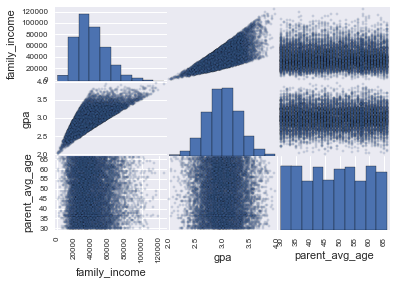

In [25]:
scatter_matrix(df, alpha=0.2);

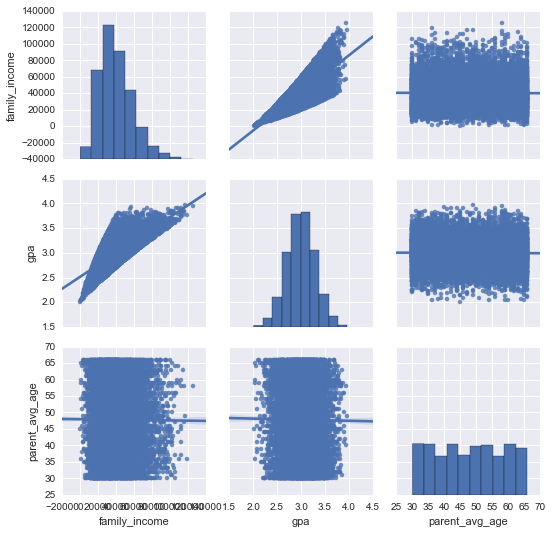

In [26]:
sea.pairplot(df, kind='reg');

In [27]:
df.var()

family_income     3.329410e+08
gpa               8.789119e-02
parent_avg_age    1.129774e+02
dtype: float64

The university wants to make an effort to make sure people of all family income are being fairly represented in the admissions process. In order to achieve that, different GPA thresholds will be set according to family income.

In [28]:
df[:2]

,family_income,gpa,parent_avg_age
0,31402,3.18,32
1,32247,2.98,48


In [29]:
df['income_categories'] = pd.cut(df.family_income
                                ,bins=[0,26832,37510,125509]
                                ,labels= ['low', 'medium', 'high'])

This time we will see how to use Kernel Density Estimation (KDE) to estimate the probability density function. KDE is a nonparametric technique for density estimation in which a known density function (the kernel) is averaged across the observed data points to create a smooth approximation. Also, KDE is a non-parametric density estimators, this means that the estimator has not a fixed functional form but only it depends upon all the data points we used to reach an estimate and the result of the procedure has no meaningful associated parameters.

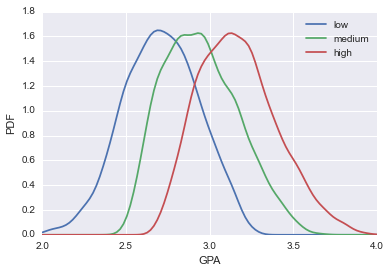

In [30]:
income_groups = df.groupby('income_categories')['gpa']
x = np.linspace(2, 4, 100)

for i in ['low', 'medium', 'high']:
    pdf = gaussian_kde(income_groups.get_group(i).values)
    plt.plot(x, pdf(x), label=i)
plt.xlabel('GPA')
plt.ylabel('PDF')
plt.legend();

If the university decides to accept students with GPA above the 90th percentile within the respective family income categories, what are the GPA thresholds for each of the categories?

In [31]:
df.groupby('income_categories')['gpa'].apply(lambda x: np.percentile(x, 90))

income_categories
low       3.01
medium    3.26
high      3.49
Name: gpa, dtype: float64

### Pearson Correlation vs Spearman Correlation

In [32]:
df_ = pd.read_csv('data/admisiones_otros.csv')

In [33]:
df_[:2]

,family_income,gpa,family_income_cat,parent_avg_age,hrs_studied,sport_performance
0,31402,3.18,medium,32,49.463745,0.033196
1,32247,2.98,medium,48,16.414467,0.000317


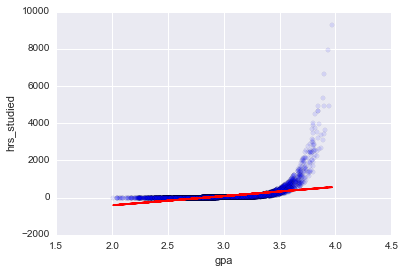

In [42]:
plt.scatter(df_.gpa, df_.hrs_studied, alpha=0.1);
slope, intercept, r_value, p_value, std_err = stats.linregress(df_.gpa, df_.hrs_studied)
plt.plot(df_.gpa, intercept + slope* df_.gpa, 'r'); # linear least squares fitting
plt.xlabel('gpa');
plt.ylabel('hrs_studied');


The Pearson product-moment correlation coefficient. 

Sometimes referred to as the **PPMCC** or **PCC** or **Pearson's r**

In [35]:
pearsonr = stats.pearsonr(df_.gpa, df_.hrs_studied)
pearsonr

(0.47594026466221012, 0.0)

---
Our scatter plot show us a monotonic relationship.

Spearman is able to capture nonlinear monotonic data, which Pearson is unable to capture.

A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. 

I should use Spearman's rank-order correlation based on my assumption of having a monotonic dataset.

**Spearman's rank correlation coefficient or Spearman's rho.**
https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php

The Spearman's rank-order correlation is the non parametric version of the Pearson product-moment correlation.

The Spearman correlation is less sensitive than the Pearson correlation to strong outliers that are in the tails of both samples. That is because Spearman's rho limits the outlier to the value of its rank.

Elo: Rank is *rango* in spanish! see di.

$ d_i = \operatorname{rg}(X_i) - \operatorname{rg}(Y_i)$
---

In [36]:
spearmanr = stats.spearmanr(df_.gpa, df_.hrs_studied)
spearmanr

SpearmanrResult(correlation=0.98495916559333341, pvalue=0.0)

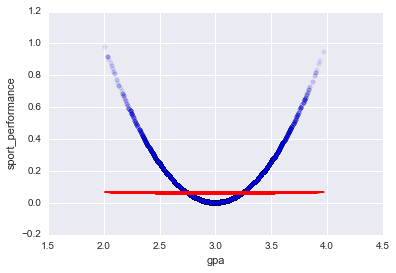

In [48]:
plt.scatter(df_.gpa, df_.sport_performance, alpha=0.1);
slope, intercept, r_value, p_value, std_err = stats.linregress(df_.gpa, df_.sport_performance);
plt.plot(df_.gpa, intercept + slope*df_.sport_performance, 'r');
plt.xlabel('gpa');
plt.ylabel('sport_performance');

In [49]:
pearsonr_sport = stats.pearsonr(df_.gpa, df_.sport_performance)
pearsonr_sport

(0.023848596954762224, 0.012404492858625561)

Spearman captures monotonicity, so in the case where the data is non-monotonic, it performs worse.

In [50]:
spearmanr_sport = stats.spearmanr(df_.gpa, df_.sport_performance)
spearmanr_sport

SpearmanrResult(correlation=0.0022881402736224248, pvalue=0.81043264616449484)

### Distribution Simulation

Often times in real life applications, we can specify the values of a variable to be of a particular distribution, for example the number of sales made in the next month can be modeled as a uniform distribution over the range of 5000 and 6000.

In this scenario, we are modeling profit as a product of number of views, conversion and profit per sale, where number of views, conversion and profit per sale can be modeled as probabilistic distributions. By randomly drawing values from these distributions, we are able to get a distribution of the range of profit based on the uncertainties in the other variables.
```
Profit = Number of views * Conversion * (Wholesale_Proportion * 50 + (1-Wholesale_Proportion)*60)
```
Assumptions: - Number of views is a uniform distribution over the range of 5000 and 6000 - Conversion is a binomial distribution where the probability of success is 0.12 for each sale among the Number of views made - Profit per sale has 0.2 probability of taking the value 50 (for wholesale) and 0.8 of taking the value 60 (non-wholesale) for each sale, so you should use a binomial to model the number of the total sales that happen at wholesale.

Conversion rates are calculated by simply taking the number of conversions and dividing that by the number of total ad clicks that can be tracked to a conversion during the same time period. For example, if you had 50 conversions from 1,000 clicks, your conversion rate would be 5%, since 50 ÷ 1,000 = 5%

In [116]:
def profit(nv): # nv : number of views
    c_r = stats.binom(nv, 0.12).rvs() / nv # conversion rate
    w = stats.binom(nv, 0.2).rvs() / nv # wholesale proportion
    return nv * c_r * (w * 50 + (1 - w) * 60)


In [117]:
profit(5500)

37399.44545454546

In [118]:
# Define number of sales to be a uniform from 5000 to 6000: [a + b] = 6000
number_views = stats.uniform(5000, 1000)

In [119]:
profits = [profit(i) for i in number_views.rvs(10000)]

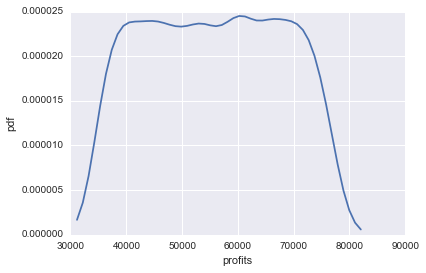

In [125]:
x = np.linspace(min(profits), max(profits))
pdf = stats.gaussian_kde(profits)
plt.plot(x, pdf(x));
plt.xlabel('profits')
plt.ylabel('pdf');

Compute the range of values of profit where the middle 95% of the probability mass lies.

In [126]:
min_profit = np.percentile(profits, 2.5)
max_profit = np.percentile(profits, 97.5)

print 'min_profit:{} and max_profit:{}'.format(min_profit, max_profit)

min_profit:35428.837526 and max_profit:76236.8127671


---

Out of the students in a class, 60% are geniuses, 70% love chocolate, and 40% fall into both categories. Determine the probability that a randomly selected student is neither a genius nor a chocolate lover.

```
P(No Genius and Not Chocolate lover)
P(NG and NCL) = 1 - P(G and CL)
P(NG and NCL) = 1 - P(G) - P(CL) + P(GCL))
P(NG and NCL) = 1 - 0.6 - 0.7 + 0.4
P(NG and NCL) = 0.1
```

first from the sample space p(ss) = 1, I substract the geniuses and the chocolate lovers, but I need to compasate with the 40% that falls into both categories, because i already substracted those 40% when i substracted the 70%.

In [130]:
1 - 0.6 - 0.7 + 0.4

0.10000000000000009

---
You toss independently a fair coin and you count the number of tosses until the first tail appears. If this number is n, you receive 2^n dollars. What is the expected amount you will receive? How much would you be willing to play this game?


   ```
   Let X = # tosses until first tail.
   X ~ Geom(0.5), P(X = k) = 1/2^k, for all k = 1, 2, 3, ...
   W = winnings. P(W = 2^n) = 1/2^n for all n = 1, 2, 3, ...
   E(W) = sum [(2^n) P(W = 2^n)] = infinity
   In reality, no one has an infinite amount of money to play the game forever.
   ```

---
A system consists of `n` identical components, each of which is operational
   with probability `p`, independent of other components. The system is
   operational if at least `k` out of the `n` components are operational. What is
   the probability that the system is operational?

   ```
   Let X ~ Binomial(n,p)

   Then simply plug in P(X >= k) = P(k)+P(k+1)+...+P(n)
   ```


---
Suppose that *X* and *Y* are random variables with the same variance. Show
   that *X - Y* and *X + Y* are uncorrelated.

```
   cov(X-Y,X+Y) = E[ ((X-Y) - E(X-Y)) ((X+Y) - E(X+Y)) ]

   cov(X-Y, X+Y) = 0

   Correlation is just covariance scaled, so X-Y and X+Y are uncorrelated
   ```